# MEEN 689 HOMEWORK 1
Name: Chinonyelum Okereafor

UIN: 733001665

1. Data in Sheet 1 include the scores of 70 students in their final exam. Use the data to complete the following tasks. Note the 70 data are considered “population” in the context of the question.

In [32]:
#Importing all libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

In [33]:
#Reading the Excel file Q1 sheet into Python
df1 = pd.read_excel('/content/drive/MyDrive/1-School stuffs/3rd year/Fall 2024/MEEN 689/Homework/Homework 1/HW1 data.xlsx',sheet_name = 'Q1')
print(df1)

    Score
0      56
1      79
2      61
3      76
4      65
..    ...
65     77
66     65
67     76
68     84
69     80

[70 rows x 1 columns]


(a). Produce a histogram using a 10 interval (i.e., 50-60, 60-70, …)

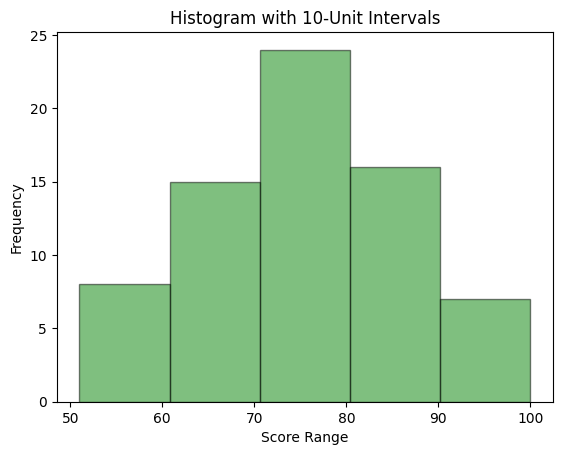

In [34]:
# Plotting a basic histogram
plt.hist(df1, bins=5, alpha = 0.5, color='green', edgecolor='black')

# Adding labels and title
plt.xlabel('Score Range')
plt.ylabel('Frequency')
plt.title('Histogram with 10-Unit Intervals')

# Display the plot
plt.show()

(b). Convert the histogram to a Probability Density Function (PDF) plot

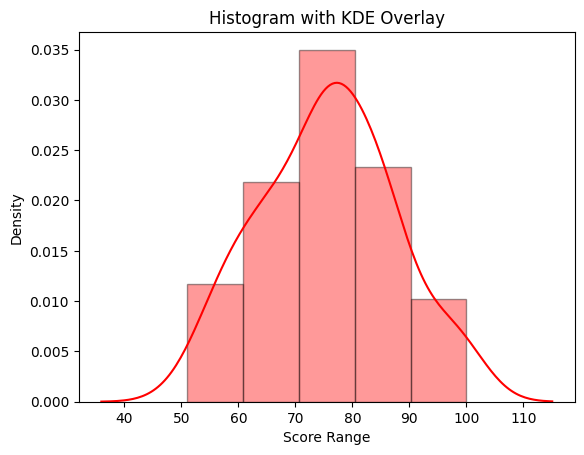

In [35]:
# Overlay the KDE on the histogram
sns.distplot(df1["Score"], bins=5, kde=True,color = 'red',hist_kws =dict(edgecolor = "black"))

# Add labels and title
plt.xlabel('Score Range')
plt.ylabel('Density')
plt.title('Histogram with KDE Overlay')

# Show the plot
plt.show()

(c). Use Matlab, Rstudio, or MiniTab to create quantile-quantile plot and comment on the normality (you may just observe or can use a formal normality test method)

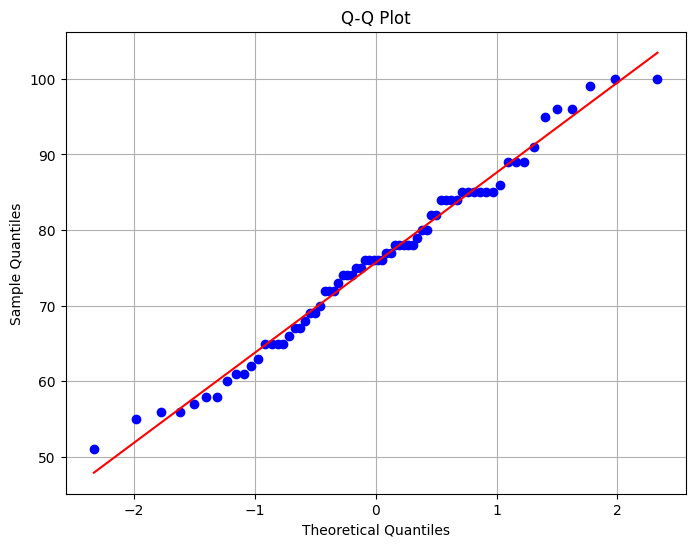

Shapiro-Wilk Test Statistic: 0.9824115451805797
p-value: 0.43148314022679496
The data appears to be normally distributed (fail to reject H0).


In [36]:
#Create the Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(df1.Score, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)

#Show the plot
plt.show()

#Perform a Shapiro-Wilk test for normality
stat, p_value = stats.shapiro(df1)

#Print the results of the Shapiro-Wilk test
print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"p-value: {p_value}")

# Comment on the normality
if p_value > 0.05:
    print("The data appears to be normally distributed (fail to reject H0).")
else:
    print("The data does not appear to be normally distributed (reject H0).")

**Comments**:
The data is normally distributed because the data points are close to the 45 degree line. Therefore, we accept the null Hypothesis H0.

(d). Randomly pick two sets of 10 samples from the data and compare each sample mean and sample standard deviation to those of the population.

In [37]:
# Population values
for i in df1.Score.values:
  print(i)

56
79
61
76
65
85
76
66
62
82
85
63
72
74
78
91
57
72
100
84
68
56
58
78
67
86
69
78
89
78
51
99
89
76
70
76
82
75
95
55
85
77
96
65
85
89
85
67
84
78
75
80
84
73
58
61
72
65
96
100
74
69
74
85
60
77
65
76
84
80


In [38]:
#Randomly picked 2 sets of 10 samples
sample1 = [56,79,72,96,82,62,75,70,61,56]
sample2 = [61,91,82,85,72,55,95,100,66,62]

In [39]:
# Sample mean
s1 = pd.DataFrame(sample1).mean()
s2 = pd.DataFrame(sample2).mean()
print("Mean for sample 1 =", s1.values)
print("Mean for sample 2 =", s2.values)

Mean for sample 1 = [70.9]
Mean for sample 2 = [76.9]


In [40]:
# Samples STD
std1 = pd.DataFrame(sample1).std()
std2 = pd.DataFrame(sample2).std()

print("Standard Deviation for sample1 =", std1.values)
print("Standard Deviation for sample2 =",std2.values)

Standard Deviation for sample1 = [12.73184983]
Standard Deviation for sample2 = [15.80752282]


In [41]:
# Population mean
avg = df1.Score.mean()
print('Population mean = ', avg)

Population mean =  75.68571428571428


In [42]:
# Population STD
sdt = df1.Score.std()
print('Population STD = ', sdt)

Population STD =  11.736901866524684


In [43]:
#Putting all together
tab = pd.DataFrame({'sample 1 mean':s1,'sample 1 STD':std1,
                   'sample 2 mean':s2,'sample 2 STD':std2,
                    'Population mean':avg,
                    'Population STD':sdt})
tab

,sample 1 mean,sample 1 STD,sample 2 mean,sample 2 STD,Population mean,Population STD
0,70.9,12.73185,76.9,15.807523,75.685714,11.736902


**Comparison:** The population mean and std are approximately 75.68 and 11.74 respectively. The population std is lower than that of the sample1 and sample2 std indicating that the population values are closer to the population mean than the sample 1 and 2 values to their mean. Sample 1 mean is the lowest at 70.9 compare to the pop mean of 75.687 and sample 2 mean of 76.9.

(e). For each sample, calculate the 95% SEM using finite population correction (FPC) and observe whether the population mean indeed falls within the range.

In [44]:
#SAMPLE 1
# Define the total population size (N)
N = df1.shape[0]

#Calculate the sample mean
mean_s1 = np.mean(sample1)

#Calculate the standard deviation
std_dev1 = np.std(sample1)

#Calculate the sample size
n1 = len(sample1)

#Apply the finite population correction (FPC)
fpc = np.sqrt((N - n1) / (N - 1))

#Calculate the SEM with FPC
sem_fpc = (std_dev1 / np.sqrt(n1)) * fpc

#Determine the critical value (for 95% confidence level)
confidence_level = 0.95
degrees_freedom = n1 - 1
t_critical = stats.t.ppf((1 + confidence_level) / 2, degrees_freedom)

#Calculate the 95% confidence interval
confidence_interval = (mean_s1 - t_critical * sem_fpc, mean_s1 + t_critical * sem_fpc)

#Output the results
print("Sample Mean:", mean_s1)
print("Standard Deviation 1: ",std_dev1)
print("Standard Error of the Mean with FPC (SEM): ", sem_fpc)
print("95% Confidence Interval:", confidence_interval)


Sample Mean: 70.9
Standard Deviation 1:  12.078493283518439
Standard Error of the Mean with FPC (SEM):  3.56175335425149
95% Confidence Interval: (62.84275413736039, 78.95724586263962)


**Observation:**
The population mean of about **75.69** falls within sample 1's 95% confidence interval of about **62.84** to  **78.96**. However, Sample 1's SEM of about **3.56** is less than Sample 2's SEM of about **4.42**. This is because sample 1 STD is lower than that of sample 2 STD.

In [45]:
#SAMPLE 2
# Define the total population size (N)
N = df1.shape[0]

# Step 2: Calculate the sample mean
mean_s2 = np.mean(sample2)

# Step 3: Calculate the standard deviation
std_dev2 = np.std(sample2)

# Step 4: Calculate the sample size
n2 = len(sample2)

# Step 5: Apply the finite population correction (FPC)
fpc = np.sqrt((N - n2) / (N - 1))

# Step 6: Calculate the SEM with FPC
sem_fpc = (std_dev2 / np.sqrt(n2)) * fpc

# Step 7: Determine the critical value (for 95% confidence level)
confidence_level = 0.95
degrees_freedom = n2 - 1
t_critical = stats.t.ppf((1 + confidence_level) / 2, degrees_freedom)

# Step 8: Calculate the 95% confidence interval
confidence_interval = (mean_s2 - t_critical * sem_fpc, mean_s2 + t_critical * sem_fpc)

# Output the results
print("Standard Deviation 2: ",std_dev2)
print(f"Sample 2 Mean: {mean_s2}")
print(f"Standard Error of the Mean with FPC (SEM2): {sem_fpc}")
print(f"95% Confidence Interval for sample 2: {confidence_interval}")


Standard Deviation 2:  14.996332885075605
Sample 2 Mean: 76.9
Standard Error of the Mean with FPC (SEM2): 4.422177311451119
95% Confidence Interval for sample 2: (66.89633991948998, 86.90366008051004)


**Observation:**
The population mean of **75.69** falls within the sample 2's 95% confidence interval from about **66.90** to **86.90**. However, Sample 2's SEM of about **4.42** is greater than Sample 1's SEM of about **3.56**. This is because sample 2 STD is higher than that of sample 1 STD.

2. Data in Sheet 2 include the numerical results (in N) of an experimental study comparing two materials using tensile test (Instron 6800 series). The sample cross-section area is set to be 5 mm by 10 mm but has an uncertainty of 1 mm2 due to the manufacturing process. Answer the following questions:

In [46]:
#Reading the Excel file Q2 sheet into Python
df2 = pd.read_excel('/content/drive/MyDrive/1-School stuffs/3rd year/Fall 2024/MEEN 689/Homework/Homework 1/HW1 data.xlsx', sheet_name='Q2')
print(df2)

   S1 (N)  S2 (N)
0    3152    3111
1    2590    3628
2    3022    3421
3    2999    3205
4    2813    2925
5    2747    3536
6    3075    3110
7    3401    2708


(a). Find the machine accuracy error and thus the force measurement uncertainty using a nominal value of 3000 N

Source: https://urldefense.com/v3/__https://www.instron.com/en/products/testing-systems/universal-testing-systems/low-force-universal-testing-systems/6800-series__;!!KwNVnqRv!HrV0n-1pexw_3POWwj5SkyymxjSzmjcxxxGPY80HPVEU-HjOdK9POV_PjnkfpMjp60vW9o0ibm3b-FdbkhdKogTAWFj_cg$

In [47]:
#Machine Accuracy Specification
MA = 0.5/100 #From the above source, the machine accuracy is 0.5% of the measured value

#Finding the Force measurement Uncertainty using a nominal value of 3000N
F = 3000  # Nominal Force in N
A = 50  # Area in mm²

#Force Measurement Uncertainty delta_F = Machine Accuracy * Nominal Force
delta_F = MA * F  # Uncertainty in Force in N
print("The Machine Accuracy of Instron 6800 series machine = ", MA*100, "%")
print("The force measurement Uncertainty = ",delta_F, "N")

The Machine Accuracy of Instron 6800 series machine =  0.5 %
The force measurement Uncertainty =  15.0 N


(b). Use Propagated Uncertainty Rule to determine the systematic error of the strength obtained (i.e., sigma = force / area). Again, here you can assume a nominal force value of 3000 N and an area of 50 mm2.

In [48]:
# Given values
F = 3000  # Nominal Force in N
A = 50  # Area in mm²
delta_A = 1  # Uncertainty in Area in mm²

#Calculated in 2(a)
delta_F = 15  # Uncertainty in Force in N

# Calculate the propagated uncertainty in strength (Systematic Error)
delta_sigma = np.sqrt((delta_F/F)**2 + (delta_A/A)**2)

# Calculate the nominal strength
sigma = F / A

print("Nominal Strength = ", sigma, "MPa")
print("Systematic Error = ", delta_sigma, "MPa")

Nominal Strength =  60.0 MPa
Systematic Error =  0.020615528128088305 MPa


(c). Use the data to determine the random error in the experiment using SEM at 95% range. Hint: use the t-table to find the t-value first.

In [49]:
# Calculate the mean and STD for the data
mean1 = df2['S1 (N)'].mean()
mean2 = df2['S2 (N)'].mean()
sd1 = df2['S1 (N)'].std()
sd2 = df2['S2 (N)'].std()

# Degrees of freedom
n = df2.shape[0]#Number of data rows
degrees_freedom = n - 1

# 95% confidence level (two-tailed)
confidence_level = 0.95

# Find the t-value from the t-distribution table
t_value = stats.t.ppf(confidence_level, df=degrees_freedom)

#calculate the sem for samples 1 and 2
sem1 = sd1 / np.sqrt(n)
sem2 = sd2 / np.sqrt(n)

# Calculate the margin of error (N)
Random_error1 = t_value * sem1
Random_error2 = t_value * sem2

# Display the results
print("T-value = ", t_value)

print("Standard Deviation for Sample 1",sd1)
print("Standard Deviation for Sample 2",sd2)

print("Sample 1 mean = ", mean1,"N")
print("Sample 2 mean = ", mean2,"N")

print("SEM for Sample 1 = ", sem1,"N")
print("SEM for Sample 2 = ", sem2,"N")

print("Random Error for sample 1 =", Random_error1,"N")
print("Random Error for sample 2 =", Random_error2,"N")

T-value =  1.894578605061305
Standard Deviation for Sample 1 254.1211395603061
Standard Deviation for Sample 2 311.31380585236775
Sample 1 mean =  2974.875 N
Sample 2 mean =  3205.5 N
SEM for Sample 1 =  89.84539051297273 N
SEM for Sample 2 =  110.06605159760076 N
Random Error for sample 1 = 170.21915462925608 N
Random Error for sample 2 = 208.52878650038807 N


(d). Combine your answers (b) and (c) to find the total uncertainty of each material case.

In [50]:
# Calculated values from (a)
Machine_accuracy = MA

# Random errors for S1 and S2 from (c)
random_error_S1 = Random_error1/A # N
random_error_S2 = Random_error2/A # N

# Total uncertainty calculation
total_uncertainty_S1 = np.sqrt((Machine_accuracy**2) + (random_error_S1**2))
total_uncertainty_S2 = np.sqrt((Machine_accuracy**2) + (random_error_S2**2))

print("Sample 1 Utotal =",total_uncertainty_S1,"MPa")
print("Sample 2 Utotal =", total_uncertainty_S2,"MPa")

Sample 1 Utotal = 3.4043867643203285 MPa
Sample 2 Utotal = 4.170578727194797 MPa


(e). Plot your results (in MPa) using a bar chart with error bars indicating the total uncertainty and comments on whether the difference is conclusive (just an observation, no need to use any statistics).

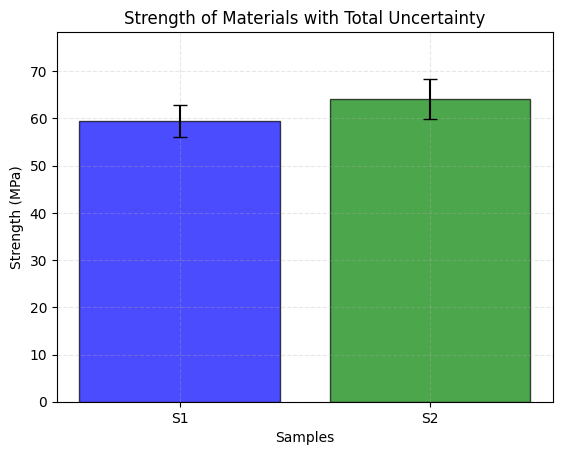

The total Uncertainty for Sample 1: 3.4043867643203285 MPa
The total Uncertainty for Sample 2: 4.170578727194797 MPa
The Mean strength for Sample 1: 59.4975 MPa
The Mean strength for Sample 2: 64.11 MPa


In [51]:
# Systematic error (in MPa)
systematic_error = 1.2369316876852983

# Total uncertainties (in MPa)
total_uncertainty_S1_MPA = total_uncertainty_S1
total_uncertainty_S2_MPA = total_uncertainty_S2

# Data for plotting
strengths = [(mean1/A),(mean2/A)]


uncertainties = [total_uncertainty_S1_MPA, total_uncertainty_S2_MPA]
labels = ['S1', 'S2']

# Plotting the bar chart with error bars
plt.bar(labels, strengths, yerr=uncertainties, capsize=5, color=['blue', 'green'], alpha=0.7,edgecolor = 'black')

# Adding labels and
plt.xlabel('Samples')
plt.ylabel('Strength (MPa)')
plt.title('Strength of Materials with Total Uncertainty')
plt.ylim(0, max(strengths) + max(uncertainties) + 10)  # Adjust y-axis for better visibility
plt.grid(True, linestyle='--', alpha=0.3)

# Show the plot
plt.show()

print("The total Uncertainty for Sample 1:", total_uncertainty_S1_MPA, "MPa")
print("The total Uncertainty for Sample 2:", total_uncertainty_S2_MPA,"MPa")
print("The Mean strength for Sample 1:", strengths[0],"MPa")
print("The Mean strength for Sample 2:" ,strengths[1],"MPa")


**Observation:** Material S1 has a mean strength of about **59.5 MPa** with **+- 3.4 MPa** uncertainty. While material S2 has a mean strength of about **64.11 MPa**  with **+- 4.17 MPa** uncertainty. This indicates that there is a significant difference in the mean strength of both materials.

The difference in the uncertainty and mean of the materials is an indication that the materials have different strengths. This means that there is **NOT** enough evidence to accept the null hypothesis H0 which suggests that the mean of the materials are **different**.